## Chapter 19 Visualize Residual Forecast Errors


#### Residual Forecast Errors

Forecast errors on time series regression problems are called residuals or residual errors. A residual error is calculated as the expected outcome minus the forecast: residual_error = expected - forecast.

Generally, when exploring residual errors we are looking for patterns or structure. A sign of a pattern suggests that the errors are not random.

We expect the residual errors to be random, because it means that the model has captured all of the structure and the only error left is the random fluctuations in the time series that cannot be modeled. A sign of a pattern or structure suggests that there is more information that a model could capture and use to make better predictions.



In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# calculate residuals from a persistence forecast
series = pd.read_csv('data/daily-total-female-births.csv', index_col=0, parse_dates=True)
series.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


#### Persistence Forecast Model

In [37]:
# create lagged dataset
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']
# split into train and test sets
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1: train_size], X[train_size:]
train_X, train_y = train[:, 0], train[:, 1]
test_X, test_y = test[:, 0], test[:, 1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
residuals.head()

,0
0,9.0
1,-10.0
2,3.0
3,-6.0
4,30.0


#### Residual Line Plot

The first plot is to look at the residual forecast errors over time as a line plot. We would expect the plot to be random around the value of 0 and not show any trend or cyclic structure.

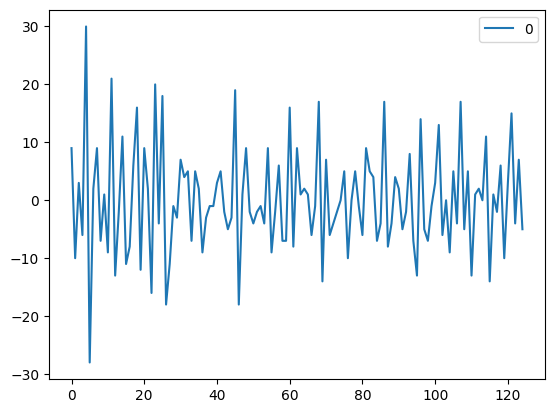

In [38]:
# line plot of residual errors
residuals.plot()
plt.show()

#### Residual Summary Statistics

We can calculate summary statistics on the residual errors. Primarily, we are interested in the mean value of the residual errors. A value close to zero suggests no bias in the forecasts, whereas positive and negative values suggest a positive or negative bias in the forecasts made.
It is useful to know about a bias in the forecasts as it can be directly corrected in forecasts prior to their use or evaluation.

In [39]:
# summary statistics
residuals.describe()

,0
count,125.000000
mean,0.064000
std,9.187776
min,-28.000000
25%,-6.000000
50%,-1.000000
75%,5.000000
max,30.000000


#### Residual Histogram and Density Plots

Plots can be used to better understand the distribution of errors beyond summary statistics. We would expect the forecast errors to be normally distributed around a zero mean. Plots can help discover skews in this distribution. We can use both histograms and density plots to better
understand the distribution of residual errors.

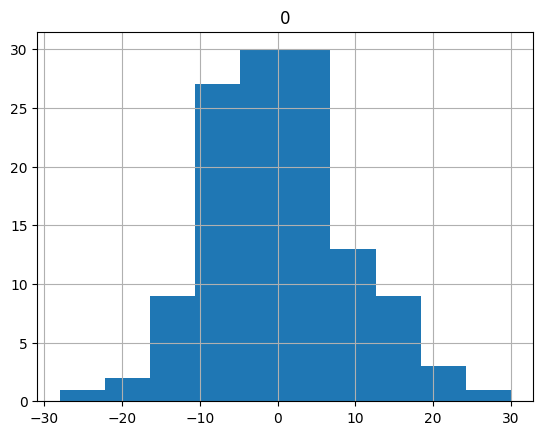

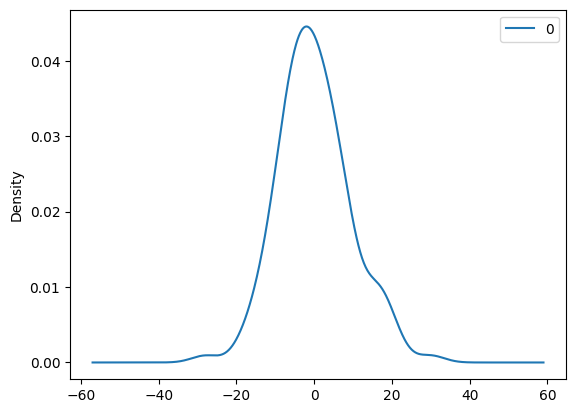

In [40]:
# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

We can see that the distribution does have a Gaussian look, but is perhaps more pointy, showing an exponential distribution with some asymmetry. If the plot showed a distribution that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling process were perhaps incorrect and that a diﬀerent modeling method may be required. A large
skew may suggest the opportunity for performing a transform to the data prior to modeling, such as taking the log or square root.

#### Residual Q-Q Plot

A Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar or diﬀerent they happen to be.

The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The values are ordered and compared to an idealized Gaussian distribution. The comparison is shown as a scatter plot (**theoretical on the x-axis and observed on the y-axis**) where a match
between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot.

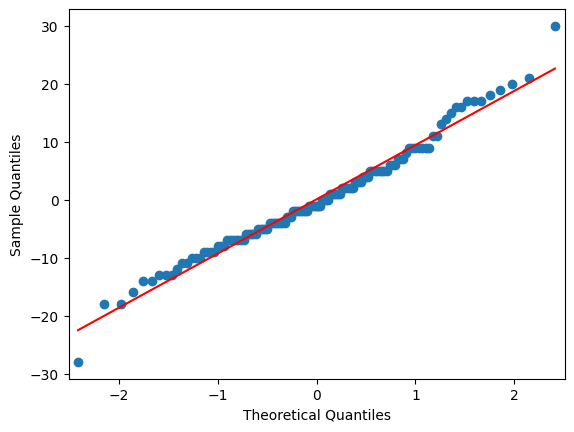

In [46]:
# Q-Q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals[0].values, line='r')
plt.show()

Running the example shows a Q-Q plot that the distribution is seemingly normal with a few bumps and outliers.

#### Residual Autocorrelation Plot

Autocorrelation calculates the strength of the relationship between an observation and observations at prior time steps. We can calculate the autocorrelation of the residual error time series and plot the results. This is called an autocorrelation plot. We would not expect there to be
any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).

A significant autocorrelation in the residual plot suggests that the model could be doing a better job of incorporating the *relationship between observations and lagged observations, called autoregression*.

The x-axis shows the lag and the y-axis shows the correlation between an observation and the lag variable, where correlation values are between -1 and 1 for negative and positive correlations respectively.

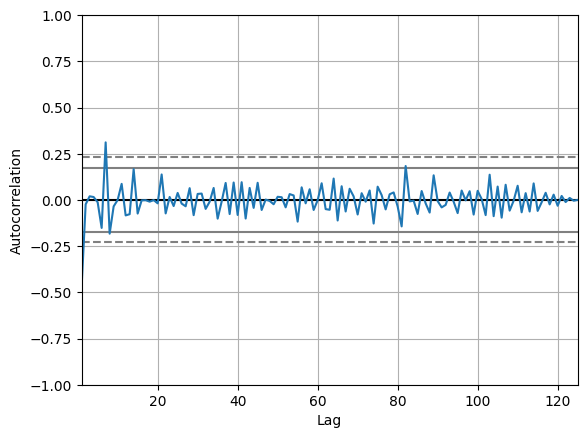

In [47]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(residuals[0].values)
plt.show()

Running the example creates an autoregression plot of other residual errors. We do not see an obvious autocorrelation trend across the plot. There may be some positive autocorrelation worthy of further investigation at lag 7 that seems significant.